# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline


In [2]:
# Read your api key environment variable
load_dotenv(dotenv_path='.env')

True

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API"])

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin AND BTC",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 2933


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Arielle Pardes',
 'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
 'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
 'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
 'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
 'publishedAt': '2022-05-10T16:59:46Z',
 'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'}

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum AND ETH",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 1463


{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'Kyle Barr',
 'title': 'GameStop Dunks Its Head Into the Crypto Kiddie Pool',
 'description': 'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though it’s hard to say whether its proposed population of gamers and game developers will take up the company on its belated, head-first jump into the crypto sph…',
 'url': 'https://gizmodo.com/gamestop-crypto-nft-wallet-blockchain-1848965386',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/cd4c128b4182d7b2fba8152d7bb35733.jpg',
 'publishedAt': '2022-05-23T21:35:00Z',
 'content': 'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take up the … [+3255 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
bitcoin_cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df = bitcoin_df[bitcoin_cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0772,0.000,0.964,0.036,"Now, even though there are a number of women-f..."
1,0.0000,0.000,1.000,0.000,Scarcely a news cycle goes by without some men...
2,0.1027,0.066,0.859,0.076,"BTC fell to its lowest level since last July, ..."
3,0.0000,0.000,1.000,0.000,Informed Tip of the Week: Take a look at our r...
4,-0.4019,0.170,0.727,0.103,As the cryptocurrency market burns through its...


In [7]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
ethereum_cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[ethereum_cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.1027,0.040,0.960,0.000,GameStop has officially thrown itself headlong...
1,0.1027,0.066,0.859,0.076,"BTC fell to its lowest level since last July, ..."
2,-0.2263,0.075,0.879,0.046,A multi-billion dollar cryptocurrency company ...
3,-0.2732,0.055,0.945,0.000,When Bored Ape Yacht Club creators Yuga Labs a...
4,-0.1027,0.036,0.964,0.000,If you ever wanted to buy an NFT based on Ethe...


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,-0.007305,0.056060,0.888370,0.055600
std,0.419055,0.068237,0.077583,0.052577
min,-0.827100,0.000000,0.614000,0.000000
25%,-0.345300,0.000000,0.848750,0.000000
50%,0.000000,0.023000,0.895000,0.052500
75%,0.355475,0.089500,0.939500,0.086500
max,0.790200,0.246000,1.000000,0.195000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.00000,100.000000,100.000000
mean,0.073401,0.04854,0.883400,0.068080
std,0.419875,0.05856,0.081412,0.066223
min,-0.817600,0.00000,0.685000,0.000000
25%,-0.273200,0.00000,0.824000,0.000000
50%,0.000000,0.03950,0.901500,0.068000
75%,0.401900,0.07525,0.940500,0.093750
max,0.899400,0.26000,1.000000,0.315000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH

Q: Which coin had the highest compound score?

A: BTC

Q. Which coin had the highest positive score?

A: BTC

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    token = [word.lower() for word in lem if word.lower() not in sw]
    return token
    


In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0772,0.000,0.964,0.036,"Now, even though there are a number of women-f...","[even, though, number, womenfocused, crypto, s..."
1,0.0000,0.000,1.000,0.000,Scarcely a news cycle goes by without some men...,"[scarcely, news, cycle, go, without, mention, ..."
2,0.1027,0.066,0.859,0.076,"BTC fell to its lowest level since last July, ...","[btc, fell, lowest, level, since, last, july, ..."
3,0.0000,0.000,1.000,0.000,Informed Tip of the Week: Take a look at our r...,"[informed, tip, week, take, look, recent, seri..."
4,-0.4019,0.170,0.727,0.103,As the cryptocurrency market burns through its...,"[cryptocurrency, market, burn, worst, crash, y..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.1027,0.040,0.960,0.000,GameStop has officially thrown itself headlong...,"[gamestop, ha, officially, thrown, headlong, w..."
1,0.1027,0.066,0.859,0.076,"BTC fell to its lowest level since last July, ...","[btc, fell, lowest, level, since, last, july, ..."
2,-0.2263,0.075,0.879,0.046,A multi-billion dollar cryptocurrency company ...,"[multibillion, dollar, cryptocurrency, company..."
3,-0.2732,0.055,0.945,0.000,When Bored Ape Yacht Club creators Yuga Labs a...,"[bored, ape, yacht, club, creator, yuga, labs,..."
4,-0.1027,0.036,0.964,0.000,If you ever wanted to buy an NFT based on Ethe...,"[ever, wanted, buy, nft, based, ethereum, woul..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
bitcoin_words = tokenizer(''.join(str(bitcoin_df['text'].tolist())))
bitcoin_counts = Counter(ngrams(bitcoin_words, n=2))
print(dict(bitcoin_counts))

{('even', 'though'): 1, ('though', 'number'): 1, ('number', 'womenfocused'): 1, ('womenfocused', 'crypto'): 1, ('crypto', 'space'): 3, ('space', 'odeniran'): 1, ('odeniran', 'say'): 1, ('say', 'woman'): 1, ('woman', 'still'): 1, ('still', 'underrepresented'): 1, ('underrepresented', 'ive'): 1, ('ive', 'space'): 1, ('space', 'im'): 1, ('im', 'black'): 1, ('black', 'person'): 1, ('person', 'woman'): 1, ('woman', 'b'): 1, ('b', 'char'): 3, ('char', 'scarcely'): 1, ('scarcely', 'news'): 1, ('news', 'cycle'): 1, ('cycle', 'go'): 1, ('go', 'without'): 1, ('without', 'mention'): 1, ('mention', 'bitcoin'): 1, ('bitcoin', 'first'): 1, ('first', 'widely'): 1, ('widely', 'traded'): 1, ('traded', 'cryptocurrency'): 1, ('cryptocurrency', 'bitcoin'): 1, ('bitcoin', 'often'): 1, ('often', 'seen'): 1, ('seen', 'representation'): 1, ('representation', 'larger'): 1, ('larger', 'cryptocurrency'): 1, ('cryptocurrency', 'ecosystem'): 1, ('ecosystem', 'fo'): 1, ('fo', 'char'): 1, ('char', 'btc'): 1, ('btc',

In [17]:
# Generate the Ethereum N-grams where N=2
ethereum_words = tokenizer(''.join(str(ethereum_df['text'].tolist())))
ethereum_counts = Counter(ngrams(ethereum_words, n=2))
print(dict(ethereum_counts))

{('gamestop', 'ha'): 1, ('ha', 'officially'): 1, ('officially', 'thrown'): 1, ('thrown', 'headlong'): 1, ('headlong', 'web'): 1, ('web', 'viper'): 1, ('viper', 'nest'): 1, ('nest', 'new'): 1, ('new', 'app'): 1, ('app', 'release'): 1, ('release', 'though'): 1, ('though', 'hard'): 1, ('hard', 'say'): 1, ('say', 'whether'): 1, ('whether', 'proposed'): 1, ('proposed', 'population'): 1, ('population', 'gamers'): 1, ('gamers', 'game'): 1, ('game', 'developer'): 1, ('developer', 'take'): 1, ('take', 'char'): 1, ('char', 'btc'): 1, ('btc', 'fell'): 1, ('fell', 'lowest'): 1, ('lowest', 'level'): 1, ('level', 'since'): 1, ('since', 'last'): 1, ('last', 'july'): 1, ('july', 'price'): 1, ('price', 'dropped'): 2, ('dropped', 'start'): 1, ('start', 'week'): 1, ('week', 'selloff'): 1, ('selloff', 'cryptocurrency'): 1, ('cryptocurrency', 'started'): 1, ('started', 'last'): 1, ('last', 'week'): 4, ('week', 'following'): 1, ('following', 'feds'): 1, ('feds', 'decision'): 1, ('decision', 'hike'): 1, ('hi

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_words, N=10)

[('char', 100),
 ('bitcoin', 52),
 ('cryptocurrency', 37),
 ('btc', 27),
 ('market', 24),
 ('crypto', 20),
 ('week', 20),
 ('ha', 19),
 ('price', 17),
 ('news', 16)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_words, N=10)

[('char', 100),
 ('ha', 34),
 ('market', 30),
 ('crypto', 30),
 ('cryptocurrency', 26),
 ('token', 18),
 ('last', 16),
 ('price', 16),
 ('investor', 16),
 ('asset', 15)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

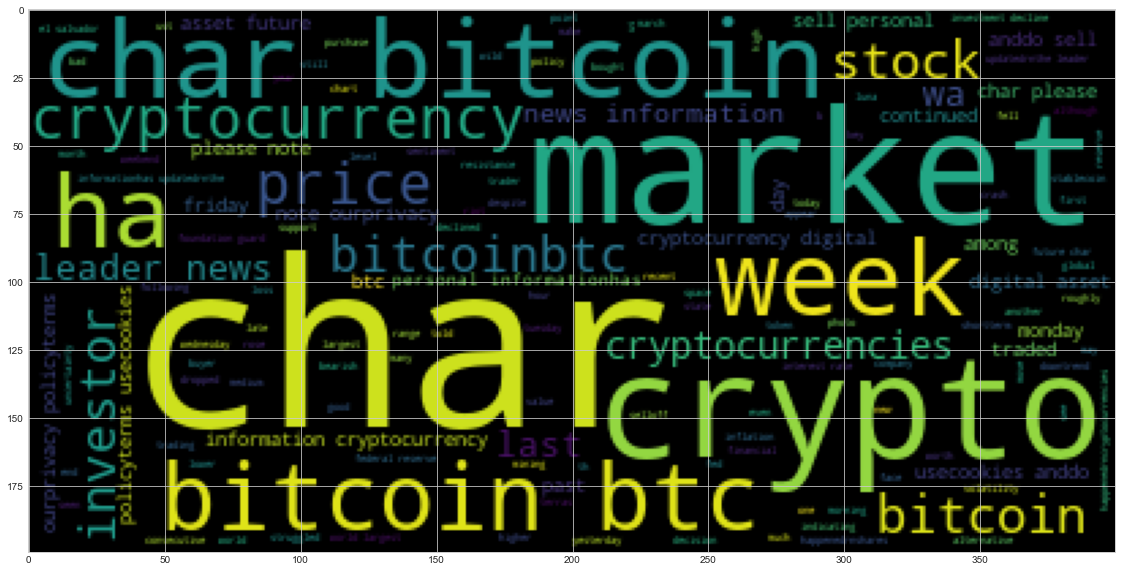

In [22]:
# Generate the Bitcoin word cloud
bitcoin_string = " ".join(bitcoin_words)
wc = WordCloud().generate(bitcoin_string)
plt.imshow(wc)

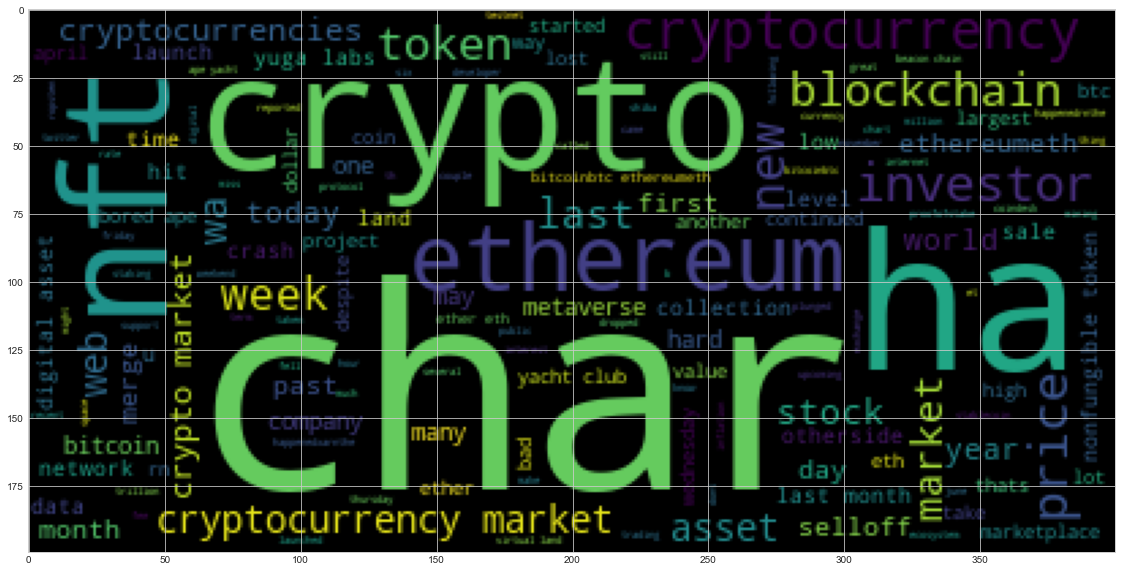

In [23]:
# Generate the Ethereum word cloud
ethereum_string = " ".join(ethereum_words)
ethereum_wc = WordCloud().generate(ethereum_string)
plt.imshow(ethereum_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy


In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
bitcoin_concat = str(bitcoin_df['text'].tolist())
bitcoin_concat

'[\'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]\', \'Scarcely a news cycle goes by without some mention of bitcoin. As the first and most widely traded cryptocurrency, bitcoin is often seen as a representation of the larger cryptocurrency ecosystem, fo… [+13892 chars]\', \'BTC fell to its lowest level since last July, as prices dropped below $33,000 to start the week. The selloff in cryptocurrency started last week, following the Fed’s decision to hike interest rates b… [+2651 chars]\', \'Informed Tip of the Week: Take a look at our recent series of posts covering Informed’s premise and our business model. We will be adding additional content over the next few weeks.\\r\\nAt the beginning… [+8392 chars]\', \'As the cryptocurrency market burns through its worst crash in years, Twitter is ablaze with ominous-looking cha

In [28]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_concat)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin spaCy Visualization"

In [29]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [30]:
# List all Entities
for ent in bitcoin_doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Odeniran GPE
first ORDINAL
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
years DATE
Twitter PRODUCT
Whale Alert PERSON
2013 DATE
1,000 CARDINAL
Bitcoins PRODUCT
more than 62x CARDINAL
one CARDINAL
REUTERS ORG
Dado Ruvic PERSON
morning TIME
Fed ORG
the last day DATE
Siegel PERSON
CryptoFinally ORG
US GPE
American NORP
more than $10 million MONEY
Bitcoin NORP
El Salvador GPE
Bitcoin NORP
the past week DATE
Tuesday DATE
El Salv ORG
daily DATE
daily DATE
daily DATE
Mark Cuban PERSON
the early 2000s DATE
Cuban NORP
TWTR,\r\n ORG
96% PERCENT
the last 24 hours TIME
late March DATE
Bitcoin NORP
Luna PERSON
TerraUSD PERSON
almost a month DATE
Federal ORG
Wednesday DATE
as much as 8.4% PERCENT
happened\r\nThis week DATE
-3.71% PERCENT
Chinese NORP
U.S. GPE
last week DATE
the holiday weekend DATE
weeks DATE
the last 24 hours TIME
2.11% PERCENT
Ethereum(ETH 3.42% PERCENT
2.18% PERCENT
Ethereum ORG
more than 20% PERCENT
-2.34% PERCENT
27,500 MONEY
35,000 MONEY
happened\r\nToday D

---

### Ethereum NER

In [31]:
# Concatenate all of the bitcoin text together
ethereum_concat = str(ethereum_df['text'].tolist())
ethereum_concat

'[\'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take up the … [+3255 chars]\', \'BTC fell to its lowest level since last July, as prices dropped below $33,000 to start the week. The selloff in cryptocurrency started last week, following the Fed’s decision to hike interest rates b… [+2651 chars]\', \'A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily brought down the Ethereum cryptocurrency.\\r\\nYuga Labs, the comp… [+3475 chars]\', \'When Bored Ape Yacht Club creators Yuga Labs announced its Otherside NFT collection would launch on April 30, it was predicted by many to be the biggest NFT launch ever. Otherside is an upcoming Bore… [+6669 chars]\', \'If you ever wanted to buy an NFT based on Ethereum, you would have to pay a transaction fee to register it on th

In [32]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_concat)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum spaCy Visualization"

In [33]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [34]:
# List all Entities
for ent in ethereum_doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

web3 LOC
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
Ethereum ORG
Yacht Club ORG
Yuga Labs PERSON
Otherside NFT LAW
April 30 DATE
NFT ORG
+6669 ORDINAL
NFT ORG
Ethereum ORG
Last week DATE
confusing.\r\nI'm PERSON
YouTuber ORG
first ORDINAL
Saturday DATE
Yuga Labs―the company ORG
the Bored Apes Yacht Club NFT collection― ORG
Otherdeeds ORG
one CARDINAL
REUTERS ORG
Dado Ruvic PERSON
years DATE
Twitter PRODUCT
earlier this month DATE
RTFKT ORG
'Days DATE
Yacht Club ORG
Yuga Labs PERSON
thousands of dollars MONEY
Ethereum ORG
Neal Stephenson PERSON
1992\ CARDINAL
Snow Crash FAC
first ORDINAL
Thursday.\xa0\r\nStephenson\ ORG
first ORDINAL
NFT ORG
Neophyte MMXXII #94 WORK_OF_ART
Ster PERSON
the first quarter DATE
GamesBeat Summit 2022 ORG
first ORDINAL
today DATE
dis ORG
Otherside LOC
NFT ORG
X2Y2 FAC
$1.5 million MONEY
59906’ ORG
eighth CARDINAL
Yuga Labs Otherside ORG
-21.76% PERCENT
The Crypto Show WORK_OF_ART
Mark Cuban PERSON
the early 2000s DATE
Cuban NORP
TWTR,\r\

---